In [161]:
import matplotlib.pyplot as plt
def show(arr):
    plt.matshow(arr)

In [173]:
import numpy as np

def extend(arr, x, y, neg_x, neg_y):
    arr = np.append(arr, np.zeros((x, arr.shape[1])), axis=0)
    arr = np.append(arr, np.zeros((arr.shape[0], y)), axis=1)
    arr = np.insert(arr, 0, np.zeros((neg_x, arr.shape[1])), axis=0)
    arr = np.insert(arr, 0, np.zeros((neg_y, arr.shape[0])), axis=1)
    print(arr.shape)
    return arr

(122, 122)
3931


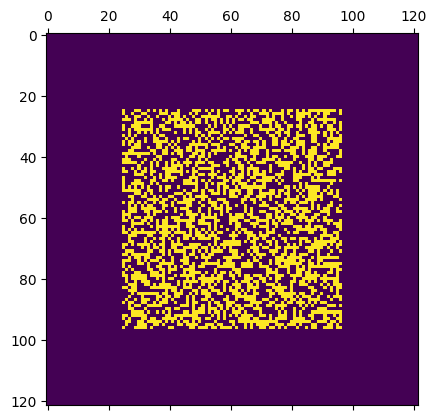

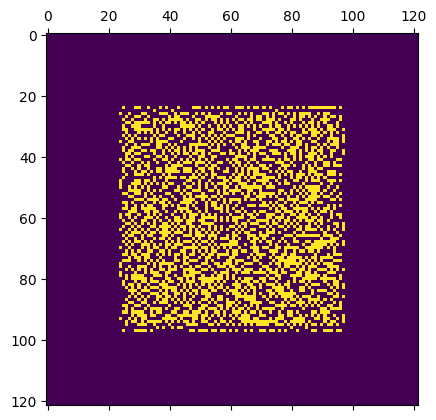

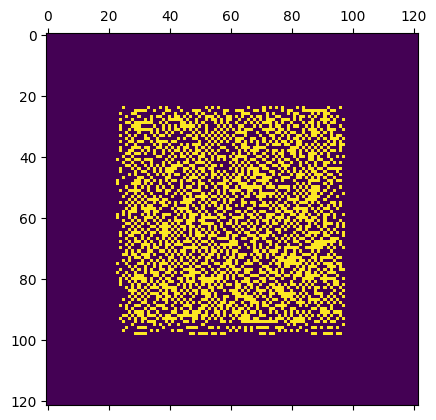

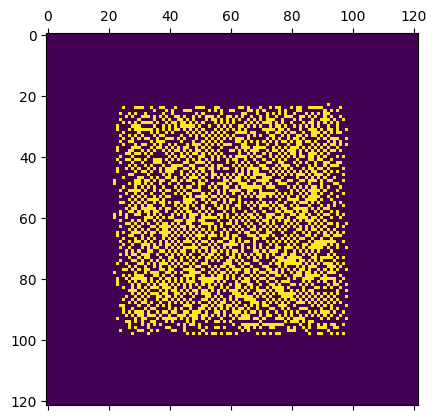

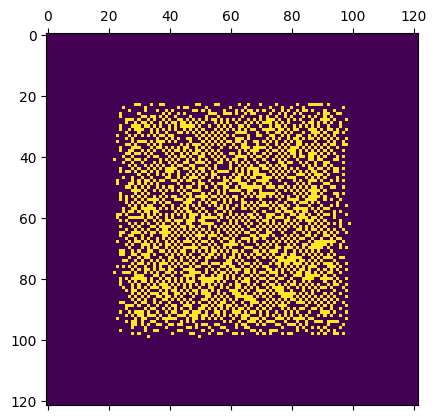

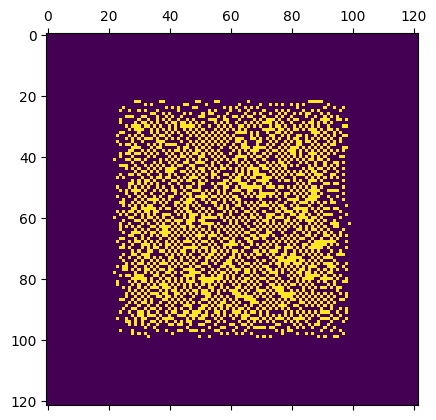

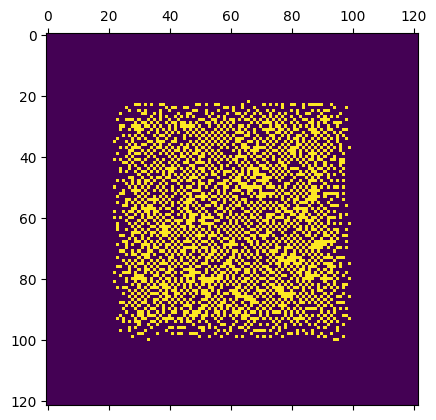

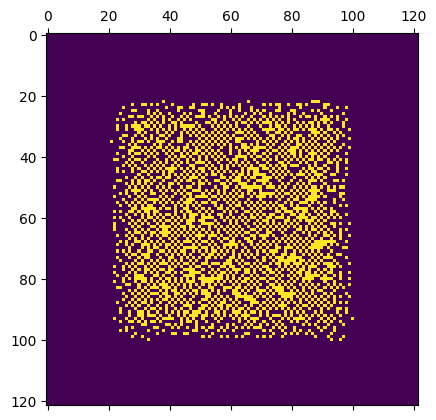

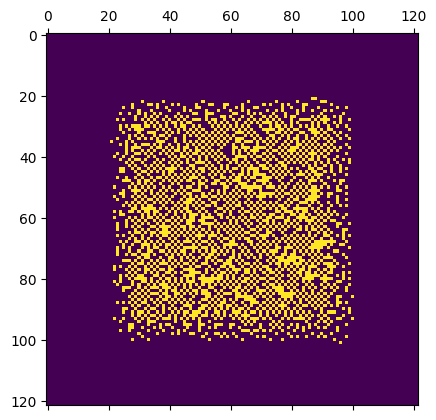

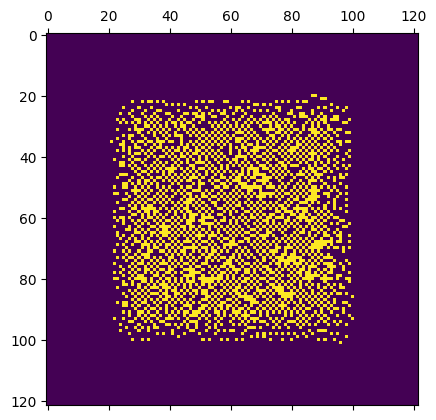

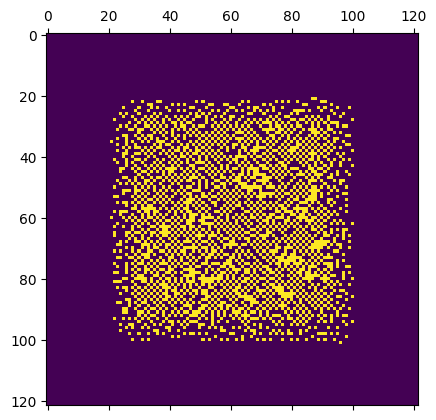

In [141]:
import numpy as np

with open('input.txt', 'r') as f:
    input = f.read()
input = input.splitlines()

# print(input)
input = [[0 if z == '.' else 1 for z in x] for x in input]
input = np.array(input)
input = extend(input, 25, 25)
show(input)
round = 0
directions = ['N', 'S', 'W', 'E']
dmap = {
    'N': [-1, 0],
    'S': [1, 0],
    'W': [0, -1],
    'E': [0, 1],
    'NW': [-1, -1],
    'NE': [-1, 1],
    'SW': [1, -1],
    'SE': [1, 1]
}
elves = np.where(input == 1)
elves = list(zip(elves[0], elves[1]))
# print(elves)
while(round < 10):
    round += 1
    move_directions = {k: [] for k in directions}
    for elf in elves:
        edmap = {k: 1 if input[elf[0] + v[0]][elf[1] + v[1]] else 0 for k, v in dmap.items()}
        check_surr = sum(edmap.values())
        if(check_surr == 0):
            continue
        for direction in directions:
            check_map = {k: v for k,v in edmap.items() if direction in k}
            check_map = sum(check_map.values())
            if(check_map == 0):
                move_directions[direction].append(elf)
                break
    # print(move_directions)
    proposed_moves = {}
    for direction, delves in move_directions.items():
        for elf in delves:
            proposed_moves[elf] = (elf[0] + dmap[direction][0], elf[1] + dmap[direction][1])
    for elf in elves:
        if elf not in proposed_moves:
            proposed_moves[elf] = elf
    # print(proposed_moves)
    elves = []
    for elf, move in proposed_moves.items():
        if(list(proposed_moves.values()).count(move) == 1):
            # print(elf)
            input[elf[0]][elf[1]] = 0
            input[move[0]][move[1]] = 1
            elves.append(move)
        else:
            elves.append(elf)
    show(input)
    # Cycle directions    
    direction = directions.pop(0)
    directions.append(direction)

bounds = np.where(input == 1)
bounds = ((bounds[0].max() - bounds[0].min()) + 1) * ((bounds[1].max() - bounds[1].min()) + 1) - len(elves)
print(bounds)


In [183]:
from matplotlib import animation
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def animate_fast(folder, frames, width):
    fig = plt.figure(frameon=False)
    ax = plt.Axes(fig, [0., 0., 1., 1.])
    ax.set_axis_off()
    fig.add_axes(ax)
    im = plt.axis('off')
    im = plt.matshow(frames[0], fignum=0)
    ratio = frames[0].shape[0] / frames[0].shape[1]
    fig.set_size_inches([width, width * ratio])

    def update_img(frame):
        im.set_data(frame)
        return im,
    my_anim = animation.FuncAnimation(fig, update_img, frames, blit=True)
    my_anim.save(f'{folder}.gif')
    return my_anim


(232, 312)
944 ROUND
945 ROUND
946 ROUND
947 ROUND
948 ROUND
949 ROUND
950 ROUND
951 ROUND
952 ROUND
953 ROUND
954 ROUND
955 ROUND
956 ROUND
957 ROUND
958 ROUND
959 ROUND
960 ROUND
961 ROUND
962 ROUND
963 ROUND
964 ROUND
965 ROUND
966 ROUND
967 ROUND
968 ROUND
969 ROUND
970 ROUND
202 67 239 108
15403


MovieWriter ffmpeg unavailable; using Pillow instead.


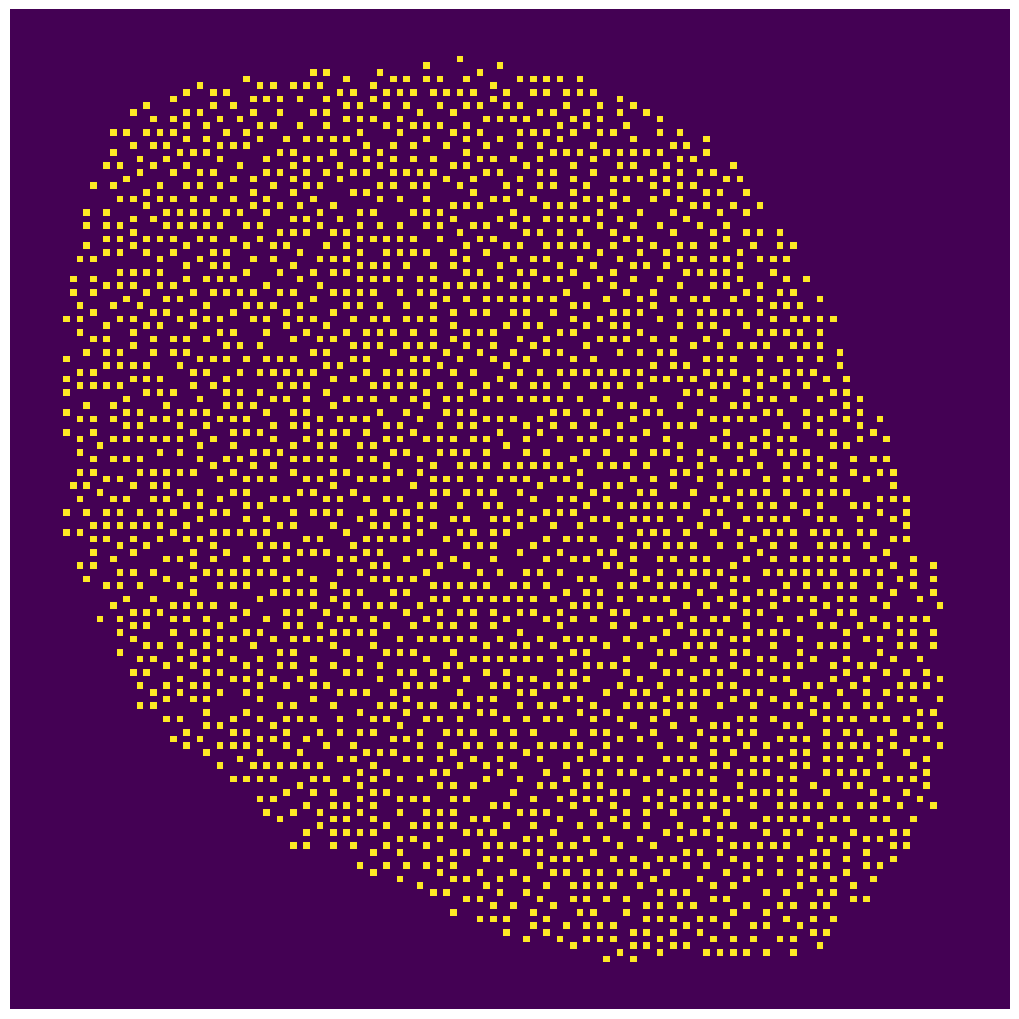

In [219]:
import numpy as np

with open('input.txt', 'r') as f:
    input = f.read()
input = input.splitlines()

# print(input)
input = [[0 if z == '.' else 1 for z in x] for x in input]
input = np.array(input)
input = extend(input, 80, 120, 80, 120)
round = 0
directions = ['N', 'S', 'W', 'E']
dmap = {
    'N': [-1, 0],
    'S': [1, 0],
    'W': [0, -1],
    'E': [0, 1],
    'NW': [-1, -1],
    'NE': [-1, 1],
    'SW': [1, -1],
    'SE': [1, 1]
}
bounds = np.where(input == 1)
elves = list(zip(bounds[0], bounds[1]))
# print(elves)
frames = []
while(round < 970):
    frames.append(input.copy())
    round += 1
    move_directions = {k: [] for k in directions}
    moved = 0
    for elf in elves:
        edmap = {k: 1 if input[elf[0] + v[0]][elf[1] + v[1]] else 0 for k, v in dmap.items()}
        check_surr = sum(edmap.values())
        if(check_surr == 0):
            continue
        for direction in directions:
            check_map = {k: v for k,v in edmap.items() if direction in k}
            check_map = sum(check_map.values())
            if(check_map == 0):
                move_directions[direction].append(elf)
                break
    proposed_moves = {}
    for direction, delves in move_directions.items():
        for elf in delves:
            proposed_moves[elf] = (elf[0] + dmap[direction][0], elf[1] + dmap[direction][1])
    check = []
    for elf in elves:
        if elf not in proposed_moves:
            check.append(elf)
            proposed_moves[elf] = elf
    elves = []
    for elf, move in proposed_moves.items():
        if(list(proposed_moves.values()).count(move) == 1):
            if(elf not in check):
                moved += 1
            input[elf[0]][elf[1]] = 0
            input[move[0]][move[1]] = 1
            elves.append(move)
        else:
            elves.append(elf)
    if(moved == 0):
        print(f"Final round: {round}")
    direction = directions.pop(0)
    directions.append(direction)

bounds = np.where(input == 1)
print(bounds[0].max(), bounds[0].min(), bounds[1].max(), bounds[1].min())
bounds = ((bounds[0].max() - bounds[0].min()) + 1) * ((bounds[1].max() - bounds[1].min()) + 1) - len(elves)
frames = [frame[60:210, 100:250] for frame in frames]
print(bounds)
animate_fast('part_two', frames, 10)

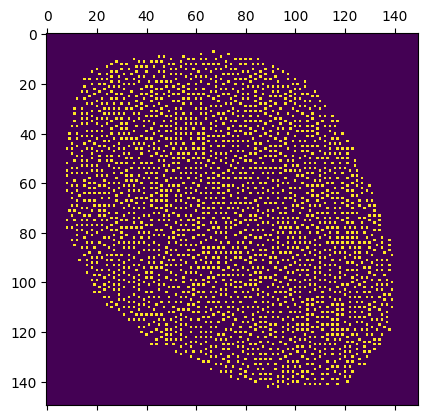

In [215]:
show(frames[-1][60:210, 100:250])